In [61]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from config import info
from sqlalchemy import inspect
from sqlalchemy.orm import Session


In [62]:
engine = create_engine(f'postgresql+psycopg2://{info}')

Base = automap_base()
Base.prepare(engine, schema='market', reflect=True)

instagram = Base.classes.instagram

instagram_hash_post = Base.classes.instagram_hash_post

instagram_hashtag = Base.classes.instagram_hashtag

session = Session(engine)

instgram_result = session.query(instagram)

ig_df = pd.read_sql(instgram_result.statement, con=engine.connect())

ig_df


/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_81480/2574185825.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='market', reflect=True)


,id,type,commentscount,likescount,ig_timestamp,videoviewcount,videoplaycount,videoduration
0,3.075854765464166e+18,Sidecar,1.0,17.0,2023-04-07 18:01:40,NaN,NaN,NaN
1,3.070078623458052e+18,Image,0.0,17.0,2023-03-30 18:45:16,NaN,NaN,NaN
2,3.0787400049486223e+18,Video,0.0,8.0,2023-04-11 17:35:00,97.0,242.0,5.202
3,3.073725354955596e+18,Image,1.0,17.0,2023-04-04 19:30:37,NaN,NaN,NaN
4,3.06935386837853e+18,Image,1.0,10.0,2023-03-29 18:45:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
190,2.820808543447755e+18,Image,2.0,31.0,2022-04-20 20:30:06,NaN,NaN,NaN
191,2.8156445350625736e+18,Image,0.0,17.0,2022-04-13 17:30:09,NaN,NaN,NaN
192,2.8273166147725676e+18,Image,0.0,12.0,2022-04-29 20:00:28,NaN,NaN,NaN
193,2.821493059556366e+18,Image,0.0,16.0,2022-04-21 19:10:07,NaN,NaN,NaN


In [63]:
instagram_hash_post_result = session.query(instagram_hash_post)

ig_hp_df = pd.read_sql(instagram_hash_post_result.statement, con=engine.connect())

ig_hp_df


,row_index,id,hashtag_index
0,0,3.075854765464166e+18,0
1,1,3.075854765464166e+18,58
2,2,3.075854765464166e+18,95
3,3,3.075854765464166e+18,134
4,4,3.075854765464166e+18,153
...,...,...,...
38425,38425,2.8222431993343503e+18,1507
38426,38426,2.8222431993343503e+18,1509
38427,38427,2.8222431993343503e+18,1572
38428,38428,2.8222431993343503e+18,1624


In [64]:
instagram_hashtags_result = session.query(instagram_hashtag)

ig_hashtag_df = pd.read_sql(instagram_hashtags_result.statement, con=engine.connect())
ig_hashtag_df

,index_num,hashtag
0,0,Tech
1,1,EssentialTool
2,2,jobs.
3,3,TapIn
4,4,TechIndustry
...,...,...
1653,1653,Newark
1654,1654,Atlanta
1655,1655,LosAngeles
1656,1656,KKCF2022


In [65]:
session.close()

In [ ]:
# Merge ig_df and ig_hp_df based on the 'id' column
merged_df = pd.merge(ig_df, ig_hp_df, on='id', how='left')

# Merge merged_df and ig_hashtag_df based on the 'hashtag_index' and 'index_num' columns
working_df = pd.merge(merged_df, ig_hashtag_df, left_on='hashtag_index', right_on='index_num', how='left')

# Print the final merged dataframe
print(working_df)

working_df.to_csv('working.csv')


In [45]:
unique_ids_df = working_df.drop_duplicates(subset='id')


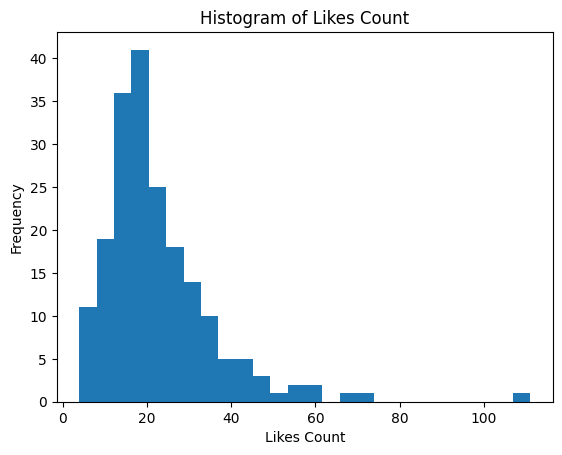

In [47]:
plt.hist(unique_ids_df['likescount'], bins='auto')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('Histogram of Likes Count')
plt.show()
